In [49]:
stopwords = list(set([
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다', '방이', '제대로',
    '고', '면', '게', '지', '죠',
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데',
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', '그렇다',
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',
    '바로', '때', '것', '수', '문제', '경우', '부분', '이다',
    '내용', '결과', '자체', '가지',
    '않았어요', '있었어요', '했어요', '했는데요', '있는데요', '합니다', '없다', '나다','생각하다',
    '했다', '같다', '네요','아니다',
    '좀', '너무', '정말', '많이', '조금',
    '사장', '이용', '용하다', '물이',
    '뿐', '대로', '만', '따름', '나름', '김에', '터',
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니', '않다', '안되다','안','그냥',
    '가다', '오다', '주다', '말다', '나다', '받다', '알다', '모르다', '싶다', '생각하다', '들다'
]))

stopwords = set(w.lower() for w in stopwords)

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# 1. CSV 파일 불러오기
train_df = pd.read_csv("ratings_train.csv", encoding="utf-8-sig")
test_df = pd.read_csv("ratings_test.csv", encoding="utf-8-sig")

train_df = train_df[train_df['label'].isin([0, 1])]
test_df = test_df[test_df['label'].isin([0, 1])]

vectorizer = CountVectorizer(stop_words=stopwords)

# 2. 벡터화 (BoW 방식, 단순 단어 단위 토크나이징)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])

y_train = train_df["label"]
y_test = test_df["label"]

# 3. 모델 학습
model = MultinomialNB()
model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = model.predict(X_test)

print("=== 📊 Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== 🧾 Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))


=== 📊 Confusion Matrix ===
[[182  39]
 [ 79 199]]

=== 🧾 Classification Report ===
              precision    recall  f1-score   support

           0      0.697     0.824     0.755       221
           1      0.836     0.716     0.771       278

    accuracy                          0.764       499
   macro avg      0.767     0.770     0.763       499
weighted avg      0.775     0.764     0.764       499



In [ ]:
#!pip install joblib

In [52]:
import joblib

# 모델과 벡터라이저 저장
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ 모델과 벡터라이저 저장 완료!")

✅ 모델과 벡터라이저 저장 완료!


In [53]:
new_sentences = ["그냥 저냥 나쁘지 않음", "왜이렇게 냄새나는 방을 줍니까"]
X_new = vectorizer.transform(new_sentences)
predictions = model.predict(X_new)
probs = model.predict_proba(X_new)

for i, text in enumerate(new_sentences):
    print(f"문장: {text}")
    print(f"예측 감성: {predictions[i]} (긍정 확률: {probs[i][1]:.3f})\n")

문장: 그냥 저냥 나쁘지 않음
예측 감성: 0.0 (긍정 확률: 0.064)

문장: 왜이렇게 냄새나는 방을 줍니까
예측 감성: 0.0 (긍정 확률: 0.200)



In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_df["text"])
X_test = tfidf.transform(test_df["text"])

# 모델 학습
model = MultinomialNB()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("=== TF-IDF Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== TF-IDF Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

=== TF-IDF Confusion Matrix ===
[[196  25]
 [ 95 183]]

=== TF-IDF Classification Report ===
              precision    recall  f1-score   support

           0      0.674     0.887     0.766       221
           1      0.880     0.658     0.753       278

    accuracy                          0.760       499
   macro avg      0.777     0.773     0.759       499
weighted avg      0.788     0.760     0.759       499



In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# 1~2그램 적용 (ex: "맛있어요", "정말 맛있어요")
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_ng = ngram_vectorizer.fit_transform(train_df["text"])
X_test_ng = ngram_vectorizer.transform(test_df["text"])

# 모델 학습
model = MultinomialNB()
model.fit(X_train_ng, y_train)

# 예측 및 평가
y_pred_ng = model.predict(X_test_ng)

print("=== N-gram Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_ng))
print("\n=== N-gram Classification Report ===")
print(classification_report(y_test, y_pred_ng, digits=3))


=== N-gram Confusion Matrix ===
[[183  38]
 [ 86 192]]

=== N-gram Classification Report ===
              precision    recall  f1-score   support

           0      0.680     0.828     0.747       221
           1      0.835     0.691     0.756       278

    accuracy                          0.752       499
   macro avg      0.758     0.759     0.751       499
weighted avg      0.766     0.752     0.752       499



In [56]:
# TF-IDF + N-gram (1~2그램)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[205  16]
 [123 155]]
              precision    recall  f1-score   support

           0      0.625     0.928     0.747       221
           1      0.906     0.558     0.690       278

    accuracy                          0.721       499
   macro avg      0.766     0.743     0.719       499
weighted avg      0.782     0.721     0.715       499



In [ ]:
# !pip install seaborn

c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


=== Confusion Matrix ===
[[185  36]
 [ 72 206]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       221
           1       0.85      0.74      0.79       278

    accuracy                           0.78       499
   macro avg       0.79      0.79      0.78       499
weighted avg       0.79      0.78      0.78       499



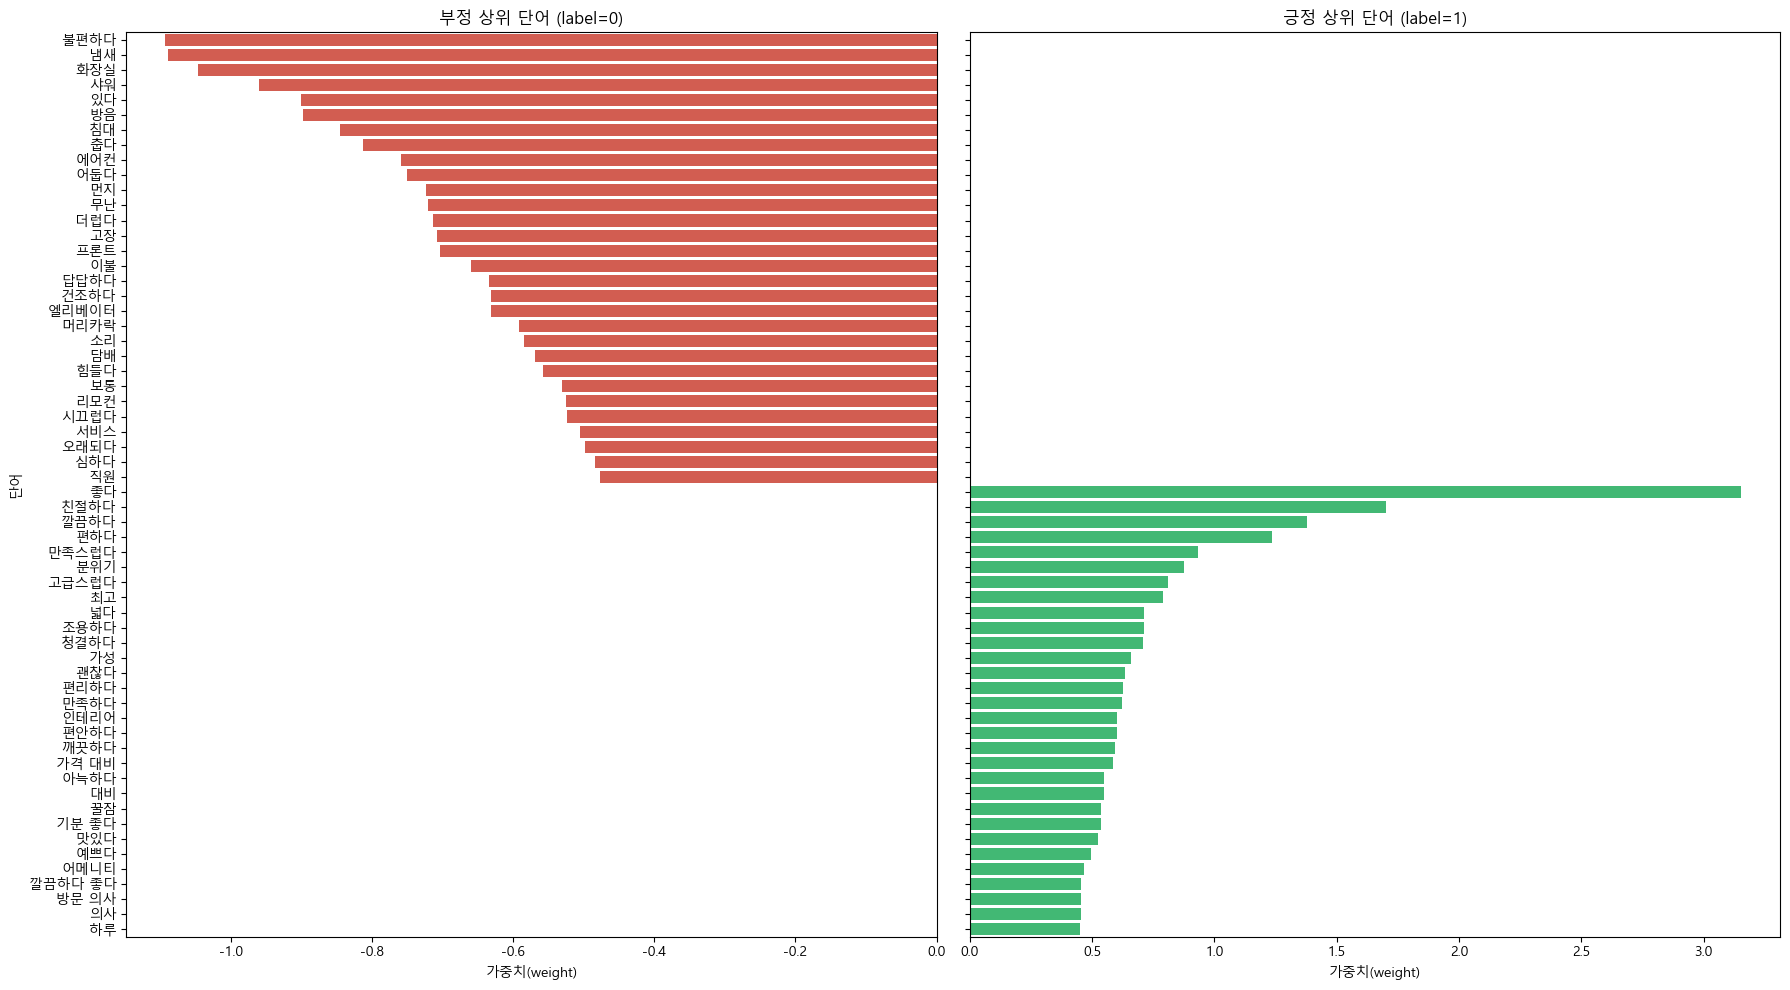

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

from konlpy.tag import Okt
import warnings

# 1. 데이터 불러오기
train_df = pd.read_csv("ratings_train.csv", encoding="utf-8-sig")
test_df = pd.read_csv("ratings_test.csv", encoding="utf-8-sig")

# ✅ 2. 긍정(1)과 부정(0)만 남기고, 그 외 중립 제거
train_df = train_df[train_df["label"].isin([0, 1])].copy()
test_df = test_df[test_df["label"].isin([0, 1])].copy()
okt = Okt()
def tokenize(text):
    try:
        return [word for word, pos in okt.pos(text, stem=True) 
                if pos in ['Noun', 'Adjective'] 
                and word not in stopwords
                and len(word) > 1
                ]
    except:
        return []

# 3. 벡터화
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])
y_train = train_df["label"]
y_test = test_df["label"]

# 4. 모델 학습 (클래스 가중치 balanced)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=2))

# 6. 중요 단어 추출 (이진 분류는 coef_[0] 사용)
feature_names = np.array(vectorizer.get_feature_names_out())
coef = model.coef_[0]

topn = 30
top_pos_idx = np.argsort(coef)[::-1][:topn]
top_neg_idx = np.argsort(coef)[:topn]

df_pos = pd.DataFrame({'word': feature_names[top_pos_idx], 'weight': coef[top_pos_idx]})
df_neg = pd.DataFrame({'word': feature_names[top_neg_idx], 'weight': coef[top_neg_idx]})

# 7. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'  # Mac이면 AppleGothic
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

sns.barplot(ax=axes[0], data=df_neg, y='word', x='weight', color='#e74c3c')
axes[0].set_title("부정 상위 단어 (label=0)")
axes[0].set_xlabel("가중치(weight)")
axes[0].set_ylabel("단어")

sns.barplot(ax=axes[1], data=df_pos, y='word', x='weight', color='#2ecc71')
axes[1].set_title("긍정 상위 단어 (label=1)")
axes[1].set_xlabel("가중치(weight)")

plt.tight_layout()
plt.show()

In [60]:
import pandas as pd
# 새 문장 리스트
df = pd.read_csv('36000_reviews.csv', encoding='utf-8-sig')

sentence = df['sentence']

# 벡터화 (학습한 vectorizer 사용)
X_new = vectorizer.transform(sentence)

# 예측 수행
predictions = model.predict(X_new)
probs = model.predict_proba(X_new)
labels = []
threshold_low = 0.42
threshold_high = 0.52

labels = []
for i, text in enumerate(sentence):
    prob_pos = probs[i][1]
    if prob_pos >= threshold_high:
        label = "긍정"
    elif prob_pos <= threshold_low:
        label = "부정"
    else:
        label = "모호"
    labels.append(label)

df['sentiment_label'] = labels

df.to_csv('36000_reviews_label.csv', encoding='utf-8-sig', index=False)


In [61]:
feature_names = np.array(vectorizer.get_feature_names_out())

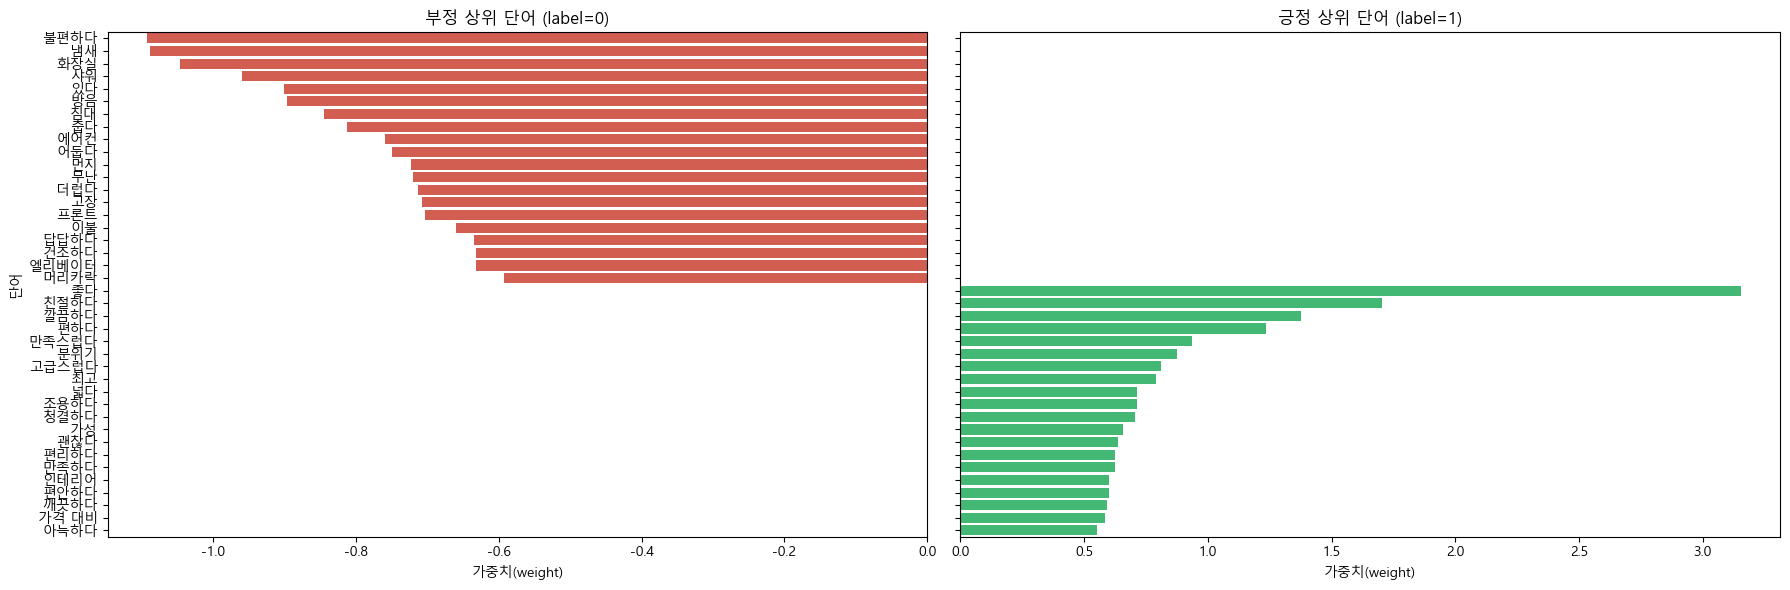

In [62]:
coef = model.coef_[0]

topn = 20
top_pos_idx = np.argsort(coef)[::-1][:topn]
top_neg_idx = np.argsort(coef)[:topn]

df_pos = pd.DataFrame({'word': feature_names[top_pos_idx], 'weight': coef[top_pos_idx]})
df_neg = pd.DataFrame({'word': feature_names[top_neg_idx], 'weight': coef[top_neg_idx]})

# 7. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'  # Mac이면 AppleGothic
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.barplot(ax=axes[0], data=df_neg, y='word', x='weight', color='#e74c3c')
axes[0].set_title("부정 상위 단어 (label=0)")
axes[0].set_xlabel("가중치(weight)")
axes[0].set_ylabel("단어")

sns.barplot(ax=axes[1], data=df_pos, y='word', x='weight', color='#2ecc71')
axes[1].set_title("긍정 상위 단어 (label=1)")
axes[1].set_xlabel("가중치(weight)")

plt.tight_layout()
plt.show()